# Table of Contents
* [Conway’s Game Of Life](#Conway’s-Game-Of Life)
	* [Animation in Matplotlib](#Animation-in-Matplotlib)
		* [Interactive Animation](#Interactive-Animation)
	* [Game of Life 3D](#Game-of-Life-3D)


# Conway’s Game Of Life

Game Of Life (GOL) is possibly one of the most notorious examples of a cellular automata.

Defined by mathematician John Horton Conway, it plays out on a two dimensional grid for which each cell can be in one of two possible states. Starting from an initial grid configuration the system evolves at each unit step taking into account only the immediate preceding configuration. If for each cell we consider the eight surrounding cells as neighbors, the system transition can be defined by four simple rules.

In [8]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [9]:
class ConwayGOL_2D:
    def __init__(self, N):
        """
        2D Conway Game of Life
        :param N: grid side size (resulting grid will be a NxN matrix)
        """
        self.N = N
        self.grid = np.random.choice(2, (N,N))
    
    def update(self):
        """
        Update status of the grid
        """
        tmpGrid = self.grid.copy()
        for i in range(self.N):
            for j in range(self.N):
                neighbours = self.grid[max(0, i-1):min(i+2,self.N), max(0, j-1):min(j+2,self.N)].sum()
                neighbours -= self.grid[i, j]
                if self.grid[i, j] == 1:
                    if neighbours > 3 or neighbours < 2:
                        tmpGrid[i, j] = 0
                elif neighbours == 3:
                    tmpGrid[i, j] = 1
        self.grid = tmpGrid

## Animation in Matplotlib

Traceback (most recent call last):
  File "/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


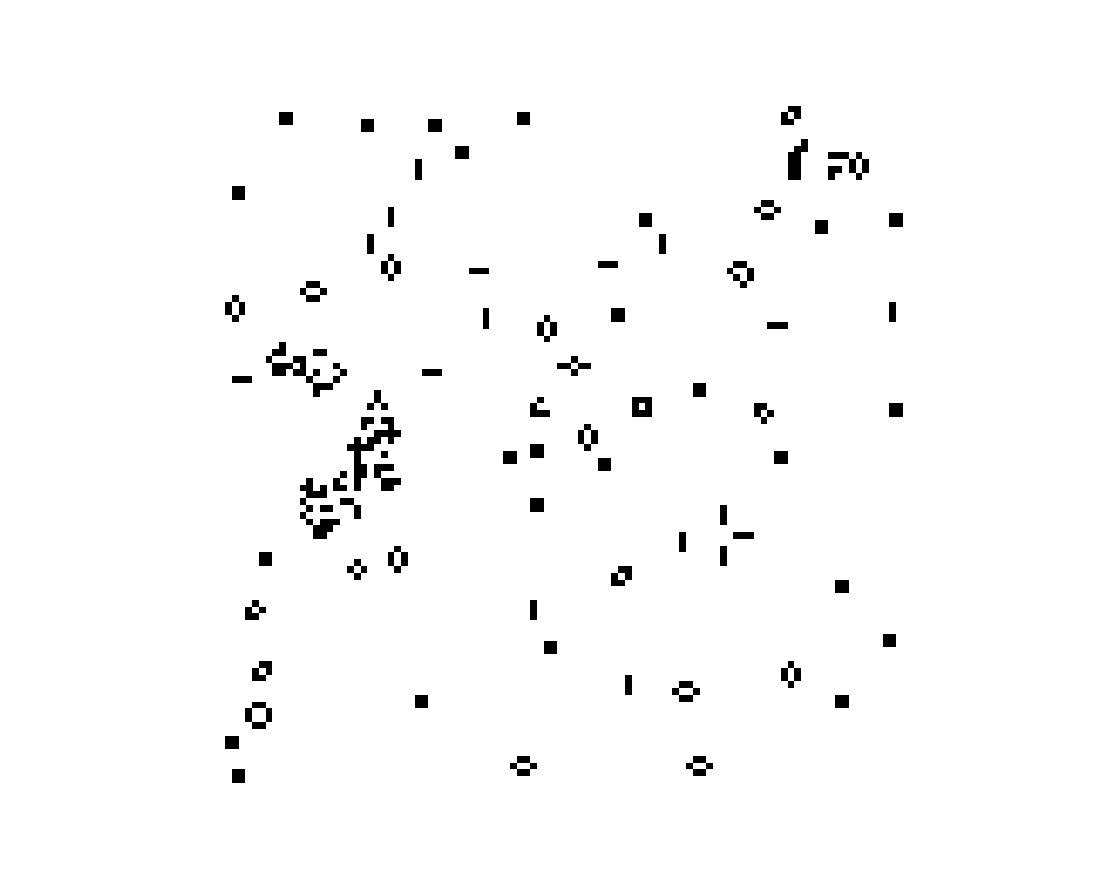

In [10]:
%matplotlib notebook
gol = ConwayGOL_2D(100)

fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
im = ax.imshow(gol.grid, cmap='Greys', interpolation='nearest')
plt.axis('off')

def animate(i):
    gol.update()
    im.set_data(gol.grid)

#ani = animation.FuncAnimation(fig, animate, frames=1000, interval=100).save('basic_animation.mp4', writer=animation.FFMpegFileWriter(fps=30))
animation.FuncAnimation(fig, animate, frames=1000, interval=100)
#plt.show()

### Interactive Animation


In [11]:
from ipywidgets import interact, widgets

In [14]:
def run_conwayGOL_2D(size):
    gol = ConwayGOL_2D(size)

    fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
    im = ax.imshow(gol.grid, cmap='Greys', interpolation='nearest')
    ax.axis('off')

    def animate(i):
        gol.update()
        im.set_data(gol.grid)

    return animation.FuncAnimation(fig, animate, frames=1000, interval=100)

In [15]:
%matplotlib notebook

from ipywidgets import interact, widgets
interact(run_conwayGOL_2D, size=(10,100))

Traceback (most recent call last):
  File "/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/Users/furnstah/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1499, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


interactive(children=(IntSlider(value=55, description='size', min=10), Output()), _dom_classes=('widget-intera…

<function __main__.run_conwayGOL_2D(size)>

## Game of Life 3D

Regarding the grid structure and neighbors counting is purely a matter of using a 3-dimensional numpy array and related indexing.
For the rules, original GOL ones are not so stable for a 3D setup.

In [7]:
class ConwayGOL_3D:
    def __init__(self, N):
        """
        3D Conway Game of Life
        :param N: 3D grid side size (resulting grid will be a NxNxN matrix)
        """
        self.N = N
        self.grid = np.random.choice(2, (N,N,N))
    
    def update(self):
        """
        Update status of the grid
        """
        tmpGrid = self.grid.copy()
        for z in range(self.N):
            for y in range(self.N):
                for x in range(self.N):
                    neighbours = self.grid[max(0, z-1):min(z+2,self.N),
                                           max(0, y-1):min(y+2,self.N), 
                                           max(0, x-1):min(x+2,self.N)].sum()
                    neighbours -= self.grid[z, y, x]
                    if self.grid[z, y, x] == 1:
                        if neighbours > 3 or neighbours < 2:
                            tmpGrid[z, y, x] = 0
                    elif neighbours == 3:
                        tmpGrid[z, y, x] = 1
        self.grid = tmpGrid